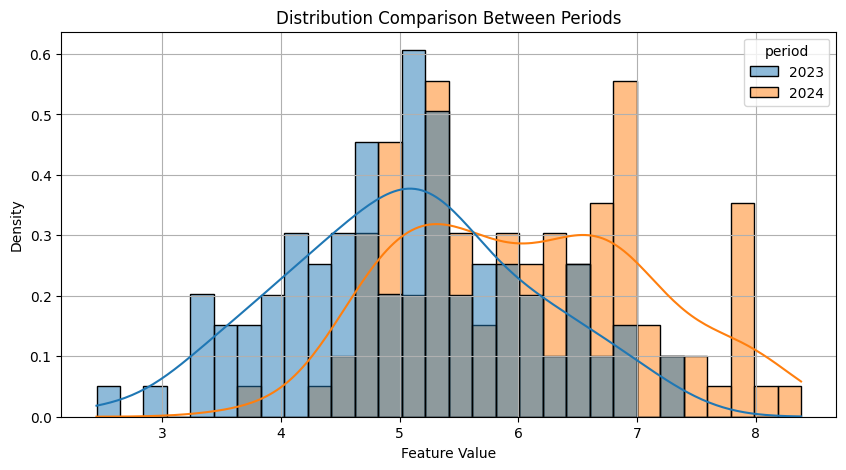

Kolmogorov–Smirnov Test Result:
KS Statistic: 0.3800
P-value: 0.0000
Result: 🚨 Significant data drift detected between periods.


In [1]:
# Question: Detecting Data Drift
# Description: Identify potential data drift between two time periods for a numeric attribute.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp  # Kolmogorov–Smirnov test

# Example: Generate synthetic data for two time periods
# In practice, replace this with: df = pd.read_csv('your_dataset.csv')
import numpy as np
np.random.seed(0)
period_1 = pd.DataFrame({'date': pd.date_range('2023-01-01', periods=100),
                         'feature': np.random.normal(loc=5.0, scale=1.0, size=100)})
period_2 = pd.DataFrame({'date': pd.date_range('2024-01-01', periods=100),
                         'feature': np.random.normal(loc=6.0, scale=1.0, size=100)})

# Combine and tag periods
period_1['period'] = '2023'
period_2['period'] = '2024'
df = pd.concat([period_1, period_2])

# Plot distributions
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='feature', hue='period', kde=True, stat='density', common_norm=False, bins=30)
plt.title('Distribution Comparison Between Periods')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Perform Kolmogorov–Smirnov Test
ks_stat, p_value = ks_2samp(period_1['feature'], period_2['feature'])

print("Kolmogorov–Smirnov Test Result:")
print(f"KS Statistic: {ks_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret result
alpha = 0.05
if p_value < alpha:
    print("Result: 🚨 Significant data drift detected between periods.")
else:
    print("Result: ✅ No significant data drift detected.")

